# Taiwan Bankruptcy

## Question: What factors are most associated with bankruptcy?

### Import some libraries/packages for the job

In [1]:
#Let's import some libraries to get started!

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sb

# Allows Outputs in Jupyter Notebook to display all columns
pd.options.display.max_columns = None

## Extract the data

In [2]:
# Import the dataset
taiwan = pd.read_csv('taiwan_bankruptcy.csv')

In [3]:
# Check the dataset
taiwan

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,7.250725e-04,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,2.559237e-02,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,6.470647e-04,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9

## Clean the data
- Ensure appropriate datatypes (are numbers actually numbers instead of a string?)
- Check for null values, duplicates, typos
- Check for outliers

In [4]:
# Get some basic information about the dataset.
taiwan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [5]:
# We see at the bottom of the previous output that it's all numbers
# Output: float64(93), int64(3)

In [6]:
taiwan.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.11

In [7]:
# There are spaces preceding each variable
# .strip() removes whitespace befor and after word
taiwanCols = taiwan.columns.values.tolist()
taiwanCols = [word.strip() for word in taiwan]

# Take the question mark out of 'Bankrupt?'
taiwanCols[0] = 'Bankrupt'
taiwanCols

# Insert new column names back into dataframe
taiwan.columns = taiwanCols
taiwan.columns

Index(['Bankrupt', 'ROA(C) before interest and depreciation before interest',
       'ROA(A) before interest and % after tax',
       'ROA(B) before interest and depreciation after tax',
       'Operating Gross Margin', 'Realized Sales Gross Margin',
       'Operating Profit Rate', 'Pre-tax net Interest Rate',
       'After-tax net Interest Rate',
       'Non-industry income and expenditure/revenue',
       'Continuous interest rate (after tax)', 'Operating Expense Rate',
       'Research and development expense rate', 'Cash flow rate',
       'Interest-bearing debt interest rate', 'Tax rate (A)',
       'Net Value Per Share (B)', 'Net Value Per Share (A)',
       'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons',
       'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)',
       'Operating Profit Per Share (Yuan ¥)',
       'Per Share Net profit before tax (Yuan ¥)',
       'Realized Sales Gross Profit Growth Rate',
       'Operating Profit Growth Rate', 'After-tax 

In [8]:
taiwan.Bankrupt.value_counts(normalize = True)

0    0.967737
1    0.032263
Name: Bankrupt, dtype: float64

In [9]:
# Check for null values if needed
taiwan.isnull().values.sum()

0

In [10]:
# Check for any duplicates
taiwan.duplicated(keep = False).sum()

0

In [11]:
# A couple columns have binary values.  Let's see if there 
    # are more than 1 values in each variable

print(taiwan['Net Income Flag'].value_counts())
print(taiwan['Liability-Assets Flag'].value_counts())

# There's only 1 value in 'Net Income Flag'  We will get rid of it for our
    # analysis

1    6819
Name: Net Income Flag, dtype: int64
0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


## Outliers
- Split into decimal data, and non decimal data
- Ignore decimal data

In [12]:
def decimal_columns(df):
    my_columns  = []
    for col in df.columns:
        if (taiwan[col].max() <= 1) & (taiwan[col].min() >= 0):
            my_columns.append(col)
    return(my_columns)

fractional_columns = decimal_columns(df = taiwan.drop(['Bankrupt'], axis=1))
non_fraction_columns = taiwan.drop(['Bankrupt'], axis = 1).columns.difference(fractional_columns)
print("# Decimal Columns", len(fractional_columns),"\t","# Other than Fraction-only Columns", len(non_fraction_columns))

# Decimal Columns 71 	 # Other than Fraction-only Columns 24


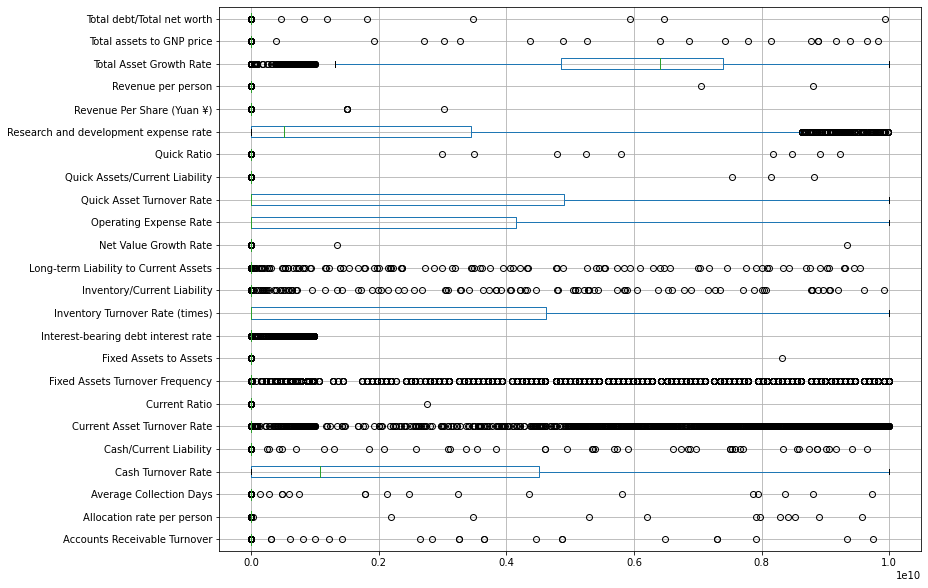

In [13]:
# Dealing with nondecimal data
# Decision - Leave them in 

taiwan[non_fraction_columns].boxplot(vert = False, figsize= (15, 10))
plt.subplots_adjust(left = 0.25)
plt.show()

Great! Our data is ready for our  Logistic Regression model!


# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y_Var = taiwan['Bankrupt']
X_Var = taiwan.drop(['Bankrupt', 'Net Income Flag'], axis = 1)

In [16]:
# Note that we are assigning 70 % of the data for training, and 30% for test set.

X_train, X_test, y_train, y_test = train_test_split(X_Var,
                                                    y_Var, 
                                                    test_size = 0.30, 
                                                    shuffle = False)

In [17]:
X_train

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.000000e+00,0.458143,0.000725,0.000000,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,0.390284,0.006479,0.095885,0.137757,0.398036,0.086957,0.001814,0.003487,1.820926e-04,1.165007e-04,0.032903,0.034164,0.392913,0.037135,0.672775,0.166673,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.000000e+00,0.461867,0.000647,0.000000,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,0.376760,0.005835,0.093743,0.168962,0.397725,0.064468,0.001286,0.004917,9.360000e+09,7.190000e+08,0.025484,0.006889,0

In [18]:
X_test

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
4773,0.465753,0.526548,0.517908,0.601695,0.601695,0.998981,0.797366,0.809292,0.303459,0.781549,1.180649e-04,4.450000e+09,0.483875,1.330133e-04,0.000000,0.175172,0.175172,0.175172,0.211591,0.342682,0.042258,0.099178,0.167809,0.022022,0.847942,0.689054,0.689054,0.217554,4.930000e+09,0.000436,0.263586,0.407064,0.017112,0.008240,0.628540,0.010234,0.156453,0.843547,0.006221,0.377562,0.005366,0.098889,0.166910,0.407646,0.148426,0.000826,0.007655,5.690000e+09,6.006592e-04,0.046290,0.017552,0.393105,0.003850,0.857330,0.324398,0.601045,0.071190,0.008937,0.005659,0.066424,0.368095,0.277348,0.021452,0.396818,0.741256,0.329895,1.582330e-02,0.930369,0.002209,0.032210,1.381623e-04,7.420000e+09,0.593982,4.660000e+09,0.671578,0.146318,0.396818,0.329895,0.129898,0.655179,0.461273,0.703361,0.316985,0.017144,0,0.792031,0.001178,0.623899,0.601695,0.839656,0.282202,0.026318,0.561069,0.023104
4774,0.577000,0.630179,0.620804,0.621773,0.621773,0.999208,0.797663,0.809528,0.303503,0.781804,2.128868e-04,1.202080e-04,0.471696,1.780178e-04,0.171677,0.194387,0.194387,0.194387,0.256405,0.331789,0.039354,0.140542,0.209987,0.022128,0.848050,0.689485,0.689485,0.217608,7.820000e+09,0.000516,0.264374,0.391211,0.018349,0.011565,0.630671,0.005510,0.111165,0.888835,0.005710,0.372523,0.005366,0.140497,0.209072,0.407658,0.158921,0.000501,0.012624,5.120000e+09,4.402817e-04,0.037

In [19]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
4768    0
4769    0
4770    0
4771    0
4772    0
Name: Bankrupt, Length: 4773, dtype: int64

In [20]:
y_test

4773    0
4774    0
4775    0
4776    0
4777    0
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt, Length: 2046, dtype: int64

## Training and Predicting

In [21]:
from sklearn.linear_model import LogisticRegressionCV

In [22]:
# Fit the model.
# After the model is fit, it has all the information that we need such as coefficients, intercept.
# In order for us to obtain those, we need to call them, which we will do in the next cells.
logmodel_1 = LogisticRegression(solver = 'newton-cg', 
                                l1_ratio = 0.5,
                                max_iter = 10000)
logmodel_1.fit(X_train, y_train)

NameError: name 'LogisticRegression' is not defined

### The following show coefficients and y-intercept for this model, just in case you're a masochist.

In [ ]:
logmodel_1.coef_

In [ ]:
logmodel_1.intercept_

In [ ]:
# Now, we predict the outcome for the test cases

predictions = logmodel_1.predict(X_test)
predictions

In [ ]:
# If we want probabilities, this is how we would get those

probabilities = logmodel_1.predict_proba(X_test)
print(probabilities)

In [ ]:
probabilities = logmodel_1.predict_proba(X_test)[:,1]
probabilities

## Evaluation

#### Time to call the libraries that are related with the evaluation criteria 

In [ ]:
# Confusion matrix simply gives the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

In [ ]:
# That's ugly.  Let's make it nicer.

cm_labeled= pd.DataFrame(cm)
cm_labeled.columns = ['Predicted 0','Predicted 1']
cm_labeled =cm_labeled.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_labeled


#So, these are the outcomes that we can obtain from the table below ;

# TN = 2012, TP = 0, FN = 32, FP = 2

In [ ]:
# Now, we can go ahead and calculate the most common metrics; Accuracy and the error rate.

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predictions)
error = 1- accuracy
print('Accuracy rate is', accuracy)
print('Error rate is', error)

### Use Synthetic Minority Oversampling Technique (SMOTE)
### Or shrink the majority, Random Under Sampling

This is far too high.  When you throw all the variablees into the mix, you risk overfitting.  Let's pick a few variables

## Let's whittle down some variables.
- Variance Inflation Factor (VIF) shows how many X variables are probably related
- Any VIF above 5 likely suffers from colinearity
- Just a general rule, not a hard line

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_Var.values, i) for i in range(X_Var.shape[1])]
vif['Variables'] = X_Var.columns

vif.sort_values('VIF', ascending = False)

### Eliminate Variables with VIF > 5

In [ ]:
# Make a separate list with variables of VIF > 5
vif_over5 = vif[(vif['VIF'] > 5)]
var2Eliminate = vif_over5['Variables'].tolist()

# Drop the columns from the list
taiwan2 = taiwan.drop(taiwan[var2Eliminate], axis = 1)
taiwan2

### We still have 50 columns left.  Let's pick 10 variables with the best VIF score, and individually evaluate each one

In [ ]:
bestVIF = vif.sort_values('VIF', ascending = True).head(10)
#print([bestVIF])

# Interest Expense Ratio (IE/Revenue) and Interest Coverage Ratio seem
    # related.  
    
# Will eliminate Interest Expense Ratio
# Eliminate Quick Ratio (related to Cash/CL ratio)

bestVIF2 = bestVIF.drop([34, 33])
bestVIF2

In [ ]:
# With columns eliminated
taiwan3 = taiwan2[bestVIF2['Variables']]

# Put the target variable back
taiwan3 = taiwan3.join(y_Var)

In [ ]:
y_Var2 = taiwan3['Bankrupt']
X_Var2 = taiwan3.drop('Bankrupt', axis = 1)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_Var2,
                                                    y_Var2, 
                                                    test_size = 0.30, 
                                                    shuffle = False)

logmodel_2 = LogisticRegressionCV(solver = 'newton-cg')
logmodel_2.fit(X_train2, y_train2)
predictions2 = logmodel_2.predict(X_test2)
cm2 = confusion_matrix(y_test2,predictions2)
cm_labeled2= pd.DataFrame(cm2)
cm_labeled2.columns = ['Predicted 0','Predicted 1']
cm_labeled2 =cm_labeled2.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_labeled2

In [ ]:
accuracy2 = accuracy_score(y_test2, predictions2)
error2 = 1 - accuracy2
print('Accuracy rate is', accuracy2)
print('Error rate is', error2)

# Stop here since it's not predicting any more bankruptcies

In [ ]:
yourNum = [0.4, 0.5, 0.2, 0.2, 0.02, 0.02, 0.001, 0.002]

probly = logmodel_2.predict_proba(([yourNum]))
print('No, Yes', probly)

## Decision Tree

In [ ]:
%matplotlib inline
import pydotplus
from sklearn.model_selection import train_test_split

# Set your x and y variables
X = taiwan.drop('Bankrupt',axis = 1)
y = taiwan['Bankrupt']

# Split into training and testing
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, 
                                                        y,
                                                        random_state = 42, 
                                                        test_size = 0.3, 
                                                        stratify = y)



from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 4 )
dtree.fit(X_train4, y_train4)
pred = dtree.predict(X_test4)

from sklearn.metrics import classification_report,confusion_matrix
cm_labeled3 = confusion_matrix(y_test4, pred)
cm_labeled3= pd.DataFrame(cm_labeled3)
cm_labeled3.columns = ['Predicted 0','Predicted 1']
cm_labeled3 =cm_labeled3.rename(index = {0: 'Actual 0', 1:'Actual 1'})
cm_labeled3

In [ ]:
accuracy3 = accuracy_score(y_test4, pred)
error3 = 1 - accuracy3
print('Accuracy rate is', accuracy3)
print('Error rate is', error3)

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot

features = list(taiwan.columns[1:])
features

dot_data = StringIO()  
export_graphviz(dtree, out_file = dot_data, 
                feature_names = features, 
                filled = True, rounded = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 